# Using the model database

This is a short introduction to how to use the model dataframe object, a database of the $\Delta L = 2$ models.

In [1]:
# These imports are necessary for completions to evaluate in the current scope
from neutrinomass.completions import EffectiveOperator, Completion
from neutrinomass.database import ExoticField

# Import the database
from neutrinomass.database import MVDF

The central object is the MVDF or "Neutrino mass dataframe"

In [2]:
MVDF

,democratic_num,stringent_num,op,dim,scale,symbolic_scale,topology,n_fields,n_scalars,n_fermions,min_loops,max_loops,n_derivs,completion
0,11,1751,D2c,7,605520000000.000,v**2/Λ,2s2f_1,1,1,0,0,0,2,Completion(operator=EffectiveOperator(name='D2...
1,7,121,D2c,7,605520000000.000,v**2/Λ,2s2f_2,1,0,1,0,0,2,Completion(operator=EffectiveOperator(name='D2...
2,2,25,D2c,7,605520000000.000,v**2/Λ,2s2f_2,1,0,1,0,0,2,Completion(operator=EffectiveOperator(name='D2...
3,11,1751,D2b,7,605520000000.000,v**2/Λ,2s2f_1,1,1,0,0,0,2,Completion(operator=EffectiveOperator(name='D2...
4,2,25,D2b,7,605520000000.000,v**2/Λ,2s2f_2,1,0,1,0,0,2,Completion(operator=EffectiveOperator(name='D2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16138,2462411311769,814306102469551469972917,36,11,5.88091842232492e-5,loop**4*v**2*yd**2*ye**2/Λ,2s6f_7,5,5,0,4,4,0,Completion(operator=EffectiveOperator(name='36...
16139,14754323817019,1029486318647909133249247,36,11,5.88091842232492e-5,loop**4*v**2*yd**2*ye**2/Λ,2s6f_8,5,5,0,4,4,0,Completion(operator=EffectiveOperator(name='36...
16140,18749226287249,1177019556021509191233283,36,11,5.88091842232492e-5,loop**4*v**2*yd**2*ye**2/Λ,2s6f_8,5,5,0,4,4,0,Completion(operator=EffectiveOperator(name='36...
16141,18640086281,200760813727741746264073,36,11,5.88091842232492e-5,loop**4*v**2*yd**2*ye**2/Λ,2s6f_9,4,3,1,4,4,0,Completion(operator=EffectiveOperator(name='36...


It contains all of the information about the models. Most if it is in the "Completion" object, an unevaluated version of which sits in the "completion" column of the dataframe. In the other columns is some exposed information:

- `democratic_num` is an integer representing the collection of fields in the model
- `stringent_num` is an integer representing the collection of terms in the Lagrangian of the model
- `op` is the label of the $\Delta L = 2$ operator from which the model is derived
- `dim` is the mass-dimension of the operator from which the completion was derived
- `scale` is the estimate of the neutrino-mass scale associated with the operator from which the completion was derived
- `symbolic_scale` is the mathematical associated expression
- `topology` is the UV topology as defined in the paper
- `n_field` is the number of fields in the model
- `n_scalars` is the number of scalar fields
- `n_fermions` is the number of fermion fields
- `min_loop` is the minimum number of loops that feature in the neutrino self-energy of the completion
- `max_loop` is the maximum number of loops
- `n_derivs` is the number of derivatives featuring in the operator from which the model is derived
- `completion` is a string on which one can call `eval` to return a `Completion` object with all other information relating to the completion. The initialisation is relatively slow, and most of the time it is unnecessary to interrogate the `Completion` until one has already cut down the number of candidate models with a search query

The `democratic_num` and `stringent_num` are calculated in the following way. Each exotic field appearing in the completions is assigned a unique prime number. The dictionary mapping between the string representation of the field and the prime number is in `MVDF.exotic2int` and `MVDF.int2exotic`. The dictionary `MVDF.exotics` is a dictionary going both ways, for convenience.

In [3]:
# e.g.
MVDF.exotics['S,10,1,7/6,1']

5

The `democratic_num` is then the product of the primes representing the fields in the model. The exotic fields are represented by strings with the following format: "S" for scalar and "F" for fermion, the dynkin digits of the $\mathrm{SU}(3)_c$ representation, the dynkin digit of the $\mathrm{SU}(2)_L$ representation, the hypercharge and three times the baryon number of the field.

The `stringent_num` is similarly a product of the unique primes representing the interactions in the model. Like with the exotic fields, each interaction term is associated with a unique prime number. These dictionaries are in `MVDF.term2int`, `MVDF.int2term` and `MVDF.terms`.

In [4]:
# e.g.
MVDF.terms[('L', 'L', 'S,00,2,1,0')]

17

In [5]:
df = MVDF.drop_duplicates(["stringent_num"], keep="first")

A simple query might look like the following. Let's look for all models in which two particular terms appear.

In [6]:
# In how many models do the right-handed and left-handed couplings of the leptoquark S_1 appear?
df[
    (df["stringent_num"] % df.terms[('L', 'Q', 'S,01,0,1/3,-1')] == 0) &
    (df["stringent_num"] % df.terms[('S,10,0,-1/3,1', 'eb', 'ub')] == 0)
]

,democratic_num,stringent_num,op,dim,scale,symbolic_scale,topology,n_fields,n_scalars,n_fermions,min_loops,max_loops,n_derivs,completion


A term appearing in the model is equivalent to the `stringent_num` of the completion being divisible by the prime associated with the interaction. (Note that the strings in the tuple are sorted lexicographically in the dictionary.) Apparently there are no models that contain both the terms $\bar{e} \bar{u} S_1^{\dagger}$ and $L Q S_1$. This can be understood simply: replacing the coupling containing $L$ with the one with $\bar{e}^\dagger$ always decreases the estimated neutrino-mass scale, so such mixed-chirality leptoquark models are always removed in the filtering procedure. How about models containing just the RH couplings?

In [7]:
# In how many models does the right-handed coupling of the leptoquark S_1 appear?
df[
    (df["stringent_num"] % df.terms[('S,10,0,-1/3,1', 'eb', 'ub')] == 0)
]

,democratic_num,stringent_num,op,dim,scale,symbolic_scale,topology,n_fields,n_scalars,n_fermions,min_loops,max_loops,n_derivs,completion
4110,61891835,1883648719004002,46,11,24282256.1517830,loop**2*v**2/Λ,2s6f_12,5,2,3,2,2,0,Completion(operator=EffectiveOperator(name='46...
4114,413698055,37039724946207626,46,11,24282256.1517830,loop**2*v**2/Λ,2s6f_17,5,3,2,2,2,0,Completion(operator=EffectiveOperator(name='46...
4115,797165,4071427882078,46,11,24282256.1517830,loop**2*v**2/Λ,2s6f_2,4,4,0,2,2,0,Completion(operator=EffectiveOperator(name='46...
4116,745735,3734342668982,46,11,24282256.1517830,loop**2*v**2/Λ,2s6f_2,4,4,0,2,2,0,Completion(operator=EffectiveOperator(name='46...
4128,3265805,65910887122546,46,11,24282256.1517830,loop**2*v**2/Λ,2s6f_3,4,4,0,2,2,0,Completion(operator=EffectiveOperator(name='46...
4151,2072629,57752925642353,46,11,24282256.1517830,loop**2*v**2/Λ,2s6f_4,4,3,1,2,2,0,Completion(operator=EffectiveOperator(name='46...
4152,1938911,59833087390331,46,11,24282256.1517830,loop**2*v**2/Λ,2s6f_4,4,3,1,2,2,0,Completion(operator=EffectiveOperator(name='46...
4154,382945,35976322428274,46,11,24282256.1517830,loop**2*v**2/Λ,2s6f_5,4,3,1,2,2,0,Completion(operator=EffectiveOperator(name='46...
4156,262015,117037845005546,46,11,24282256.1517830,loop**2*v**2/Λ,2s6f_5,4,3,1,2,2,0,Completion(operator=EffectiveOperator(name='46...
4157,52403,77051540257925089,46,11,24282256.1517830,loop**2*v**2/Λ,2s6f_5,3,2,1,2,2,0,Completion(operator=EffectiveOperator(name='46...


We can do queries by field content in a similar way, this time asking if a field's prime number divides the `democratic_num`

In [8]:
# Search for models in which both the leptoquark S_1 ~ (3b, 1, 1/3) and the scalar (1, 1, 1)
df[
    (df["democratic_num"] % df.exotics["S,01,0,1/3,-1"] == 0) &
    (df["democratic_num"] % df.exotics["S,00,0,1,0"] == 0)
]

,democratic_num,stringent_num,op,dim,scale,symbolic_scale,topology,n_fields,n_scalars,n_fermions,min_loops,max_loops,n_derivs,completion
5022,17558619,612110948646076219,40j,11,24282256.1517830,loop**2*v**2/Λ,2s6f_12,5,2,3,2,2,0,Completion(operator=EffectiveOperator(name='40...
5023,13113399,126809421727147723,40j,11,24282256.1517830,loop**2*v**2/Λ,2s6f_12,5,2,3,2,2,0,Completion(operator=EffectiveOperator(name='40...
5028,415553983,1129349576386461359,40j,11,24282256.1517830,loop**2*v**2/Λ,2s6f_13,5,2,3,2,2,0,Completion(operator=EffectiveOperator(name='40...
5029,100536059,5463690624428683,40j,11,24282256.1517830,loop**2*v**2/Λ,2s6f_13,5,2,3,2,2,0,Completion(operator=EffectiveOperator(name='40...
5030,5338270397,8544873594802126163,40j,11,24282256.1517830,loop**2*v**2/Λ,2s6f_15,5,3,2,2,2,0,Completion(operator=EffectiveOperator(name='40...
5031,1291501681,329774927981803847,40j,11,24282256.1517830,loop**2*v**2/Λ,2s6f_15,5,3,2,2,2,0,Completion(operator=EffectiveOperator(name='40...
5034,31270413,172325220525729559,40j,11,24282256.1517830,loop**2*v**2/Λ,2s6f_17,5,3,2,2,2,0,Completion(operator=EffectiveOperator(name='40...
5035,41870553,831816380636224327,40j,11,24282256.1517830,loop**2*v**2/Λ,2s6f_17,5,3,2,2,2,0,Completion(operator=EffectiveOperator(name='40...
5037,124677023,6540500315335589,40j,11,24282256.1517830,loop**2*v**2/Λ,2s6f_2,4,4,0,2,2,0,Completion(operator=EffectiveOperator(name='40...
5048,23143639,42442187065326491,40j,11,24282256.1517830,loop**2*v**2/Λ,2s6f_3,4,4,0,2,2,0,Completion(operator=EffectiveOperator(name='40...


There are many search results. Let's make a more specific query.

In [20]:
# Extend the query to look at the models with fewer than 5 fields that need to be at less than 7000 TeV
df[
    (df["democratic_num"] % df.exotics["S,01,0,1/3,-1"] == 0) &
    (df["democratic_num"] % df.exotics["S,00,0,1,0"] == 0) &
    (df["scale"] < 7000) &
    (df["n_fields"] < 5)
]

,democratic_num,stringent_num,op,dim,scale,symbolic_scale,topology,n_fields,n_scalars,n_fermions,min_loops,max_loops,n_derivs,completion
8387,3379507,30579275025083,10,9,5967.42299748072,loop**2*v**2*yd*ye/Λ,0s6f_1,3,3,0,2,2,0,Completion(operator=EffectiveOperator(name='10...
12771,12372529,1378968263787181,63d,11,37.9148278684193,loop**2*loopv2*v**2*yd*ye/Λ,2s6f_4,4,3,1,2,3,0,Completion(operator=EffectiveOperator(name='63...
12772,16179461,8614953467442367,63d,11,37.9148278684193,loop**2*loopv2*v**2*yd*ye/Λ,2s6f_4,4,3,1,2,3,0,Completion(operator=EffectiveOperator(name='63...


We find three models. Let's looks at one of them. Copy the index on the far left and ask for the completion.

Fields:
s    S(3b, 1, 4/3)(-1)   
η    S(1, 1, 1)(0)       
φ    S(3b, 1, 1/3)(-1)   

Lagrangian:


φ†(-C_0)*L(U_0, I_0, g379_)*Q(U_1, C_0, I_1, g381_)*metric(-U_0, -U_1)*metric(-I_1, -I_0)

η†*L(U_0, I_0, g380_)*L(U_1, I_1, g378_)*metric(-U_0, -U_1)*metric(-I_1, -I_0)

s†(C_0)*db(U_0, -C_0, g383_)*eb(U_1, g385_)*metric(-U_0, -U_1)

φ(C_0)*η*s(-C_1)*KD(C_1, -C_0)


Diagram:


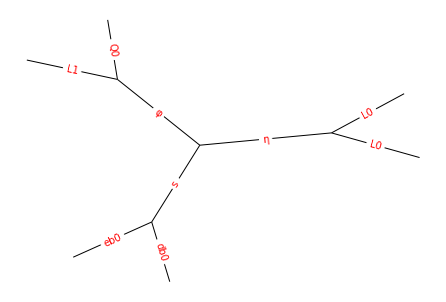

In [21]:
comp = df.completion(8387)
comp.info()

In [16]:
# We can even ask for the number of U(1) symmetries in the Lagrangian. There should be 2: Y and B.
comp.lagrangian.num_u1_symmetries()

2

This is just the $\Delta L = 2$ Lagrangian. We can generate the full thing, but it takes some time.

In [30]:
%%time
lag = comp.lagrangian.generate_full()

CPU times: user 4min 10s, sys: 1.41 s, total: 4min 11s
Wall time: 4min 17s


In [31]:
lag.num_u1_symmetries()

1

And we've lost a symmetry, since the full Lagrangian violates $\mathrm{U}(1)_B$.